In [3]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_query import PWEQuery
from PW_explorer.Custom_Visualization_Functions import euler_visualization_nxpd
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import itertools

In [4]:
import PW_explorer as pwe

## N-queens (n=8)
#### Clustering Equivalent (symmetric) solutions

In [72]:
n = 8

In [73]:
nqueens_clingo_rules = [
    '#const n = {}.'.format(n),
    '% domain',
    'number(1..n).',
    '% alldifferent',
    '1 { q(X,Y) : number(Y) } 1 :- number(X).',
    '1 { q(X,Y) : number(X) } 1 :- number(Y).',
    '% remove conflicting answers',
    ':- number(X1;X2;Y1;Y2), q(X1,Y1), q(X2,Y2), X1 < X2, Y1 == Y2.',
    ':- number(X1;X2;Y1;Y2), q(X1,Y1), q(X2,Y2), X1 < X2, Y1 + X1 == Y2 + X2.',
    ':- number(X1;X2;Y1;Y2), q(X1,Y1), q(X2,Y2), X1 < X2, Y1 - X1 == Y2 - X2.',
    '#show q/2.',
]

In [74]:
nqueens_clingo_soln = run_clingo(clingo_rules=nqueens_clingo_rules)
print('\n'.join(nqueens_clingo_soln))

Answer: 1
q(4,1) q(6,2) q(8,3) q(2,4) q(7,5) q(1,6) q(3,7) q(5,8)
Answer: 2
q(3,1) q(5,2) q(2,3) q(8,4) q(1,5) q(7,6) q(4,7) q(6,8)
Answer: 3
q(5,1) q(3,2) q(1,3) q(7,4) q(2,5) q(8,6) q(6,7) q(4,8)
Answer: 4
q(6,1) q(4,2) q(7,3) q(1,4) q(8,5) q(2,6) q(5,7) q(3,8)
Answer: 5
q(5,1) q(3,2) q(1,3) q(6,4) q(8,5) q(2,6) q(4,7) q(7,8)
Answer: 6
q(4,1) q(6,2) q(8,3) q(3,4) q(1,5) q(7,6) q(5,7) q(2,8)
Answer: 7
q(5,1) q(7,2) q(1,3) q(3,4) q(8,5) q(6,6) q(4,7) q(2,8)
Answer: 8
q(8,1) q(3,2) q(1,3) q(6,4) q(2,5) q(5,6) q(7,7) q(4,8)
Answer: 9
q(4,1) q(7,2) q(3,3) q(8,4) q(2,5) q(5,6) q(1,7) q(6,8)
Answer: 10
q(6,1) q(3,2) q(7,3) q(2,4) q(8,5) q(5,6) q(1,7) q(4,8)
Answer: 11
q(7,1) q(3,2) q(1,3) q(6,4) q(8,5) q(5,6) q(2,7) q(4,8)
Answer: 12
q(2,1) q(7,2) q(3,3) q(6,4) q(8,5) q(5,6) q(1,7) q(4,8)
Answer: 13
q(2,1) q(6,2) q(8,3) q(3,4) q(1,5) q(4,6) q(7,7) q(5,8)
Answer: 14
q(1,1) q(6,2) q(8,3) q(3,4) q(7,5) q(4,6) q(2,7) q(5,8)
Answer: 15
q(3,1) q(6,2) q(2,3) q(7,4) q(1,5) q(4,6) q(8,7) q(5,8)
Answ

In [75]:
dfs, rels, pws = load_worlds(clingo_output=nqueens_clingo_soln, preprocessed=False, reasoner='clingo')

Number of Models: 92


In [76]:
list(map(lambda x: x.__dict__, rels))

[{'relation_name': 'q_2', 'arity': 2, 'r_id': 0}]

In [77]:
def get_board_from_df(df):
    board = np.zeros((len(df), len(df)))
    for i, row in df.iterrows():
        x = int(row['x1']) - 1
        y = int(row['x2']) - 1
        board[x,y] = 1
    return board

import matplotlib.pyplot as plt
from matplotlib import colors
def visualize_nqueens_solution(dfs, pw_id):
    df = dfs[0]
    df = df[df['pw'] == pw_id]
    board = get_board_from_df(df)
    ax = plt.matshow(board)
    return ax

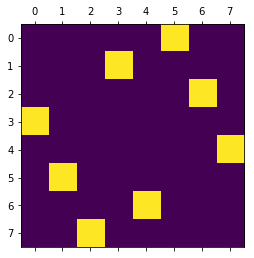

In [78]:
_ = visualize_nqueens_solution(dfs, 1)

In [79]:
# Can make it more continuous to be able to tell which solutions are actually similar
def nqueens_distance(dfs, pw_id_1, pw_id_2):
    df = dfs[0]
    pw1 = df[df['pw'] == pw_id_1]
    pw2 = df[df['pw'] == pw_id_2]
    board1 = get_board_from_df(pw1)
    board2 = get_board_from_df(pw2)
    
    are_same = False

    temp0 = board1
    temp1 = np.flip(temp0, 0)
    temp2 = np.flip(temp0, 1)
    
    if (temp0 == board2).all() or (temp1 == board2).all() or (temp2 == board2).all():
        return 0
    
    temp0 = np.rot90(board1, k=1)
    temp1 = np.flip(temp0, 0)
    temp2 = np.flip(temp0, 1)
    
    if (temp0 == board2).all() or (temp1 == board2).all() or (temp2 == board2).all():
        return 0
    
    temp0 = np.rot90(board1, k=2)
    temp1 = np.flip(temp0, 0)
    temp2 = np.flip(temp0, 1)
    
    if (temp0 == board2).all() or (temp1 == board2).all() or (temp2 == board2).all():
        return 0
    
    temp0 = np.rot90(board1, k=-1) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.rot90.html
    temp1 = np.flip(temp0, 0) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.flip.html
    temp2 = np.flip(temp0, 1)
    
    if (temp0 == board2).all() or (temp1 == board2).all() or (temp2 == board2).all():
        return 0
    
    return 1

In [80]:
dist_matrix = np.zeros((len(pws), len(pws)))
for i in range(1, len(pws)+1):
    for j in range(i+1, len(pws)+1):
        dist_matrix[i-1][j-1] = dist_matrix[j-1][i-1] = nqueens_distance(dfs, i, j)

In [81]:
# This actually already exits in PW-E but it has a small bug which should be fixed soon.
from sklearn.cluster import DBSCAN
def dbscan_clustering(dist_matrix, save_to_file=None):

    fig, ax = plt.subplots()

    db = DBSCAN(metric='precomputed', eps=0.5, min_samples=1)
    labels = db.fit_predict(dist_matrix)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) #- (1 if -1 in labels else 0)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    #x_2d = PCA(n_components = 2).fit_transform(dist_matrix)

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = dist_matrix[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = dist_matrix[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    ax.set_title('Estimated number of clusters: %d' % n_clusters_)
    if save_to_file is not None:
        fig.savefig(save_to_file)
    return fig, labels

array([ 0,  0,  0,  0,  1,  1,  2,  3,  2,  1,  4,  5,  4,  3,  1,  5,  2,
        2,  6,  1,  3,  4,  5,  6,  7,  7,  2,  7,  6,  6,  7,  5,  4,  3,
        2,  5,  1,  3,  4,  3,  5,  4,  1,  2,  6,  7,  6,  7,  7,  6,  4,
        5,  3,  6,  7,  2,  5,  3,  4,  1,  8,  9, 10,  9, 11, 10, 11,  8,
       10, 11, 10, 11,  9,  8,  8,  9, 10, 11,  9,  8,  9, 10, 11,  8, 10,
       11,  8,  9, 11,  8, 10,  9])

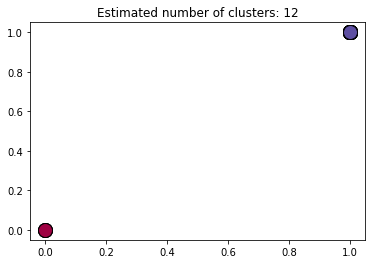

In [82]:
dbscan_fig, dbscan_labels = dbscan_clustering(dist_matrix, None)
dbscan_labels

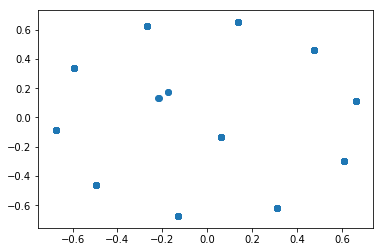

In [83]:
sklearn_mds_g = pwe.visualize.mds_sklearn(A=dist_matrix)

In [84]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
def linkage_dendrogram(dist_matrix, save_to_folder=None):

    X = squareform(dist_matrix)
    dendrogram_size = (max(25, int(np.sqrt(2 * len(X)) / 10)), 10)
    figs = []
    for dist_type in ['single', 'complete', 'average', 'weighted']:
        fig, ax = plt.subplots(figsize=dendrogram_size)
        linkage_matrix = linkage(X, dist_type)
        dendrogram(linkage_matrix, labels=[str(i) for i in range(len(dist_matrix))], show_leaf_counts=True, ax=ax)
        plt.title("Dendrogram ({})".format(dist_type))
        if save_to_folder is not None:
            fig.savefig(os.path.join(save_to_folder, '{}_dendrogram.png'.format(dist_type)))
        figs.append(fig)
    return figs

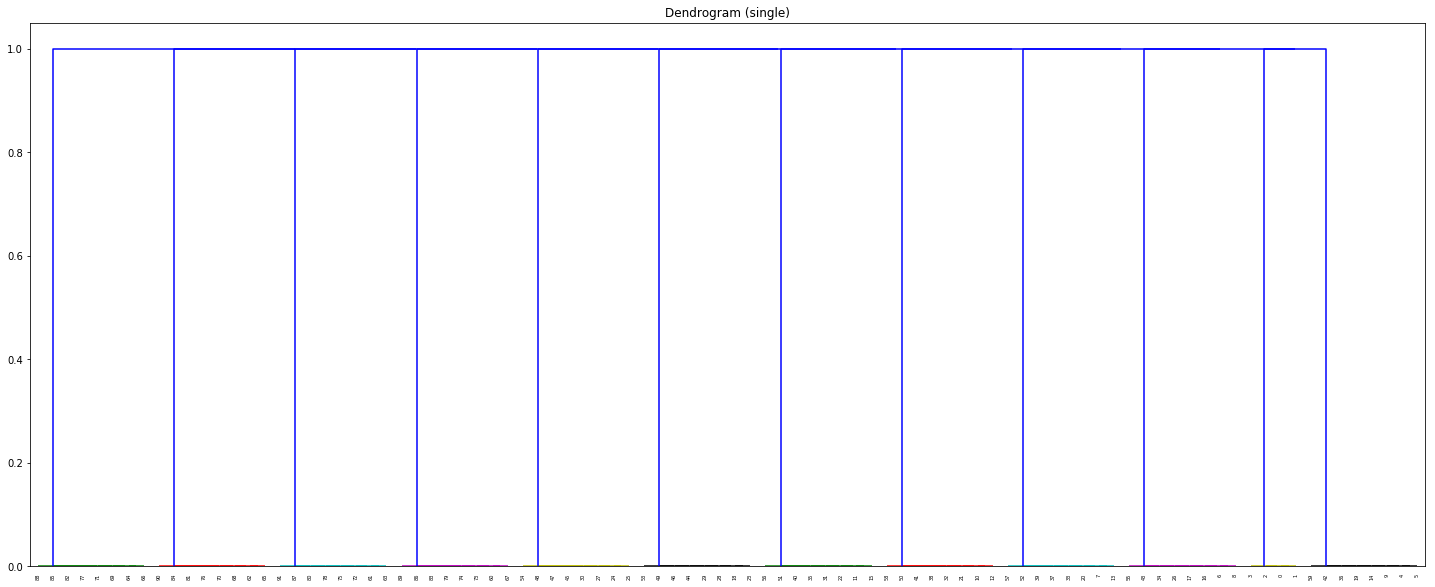

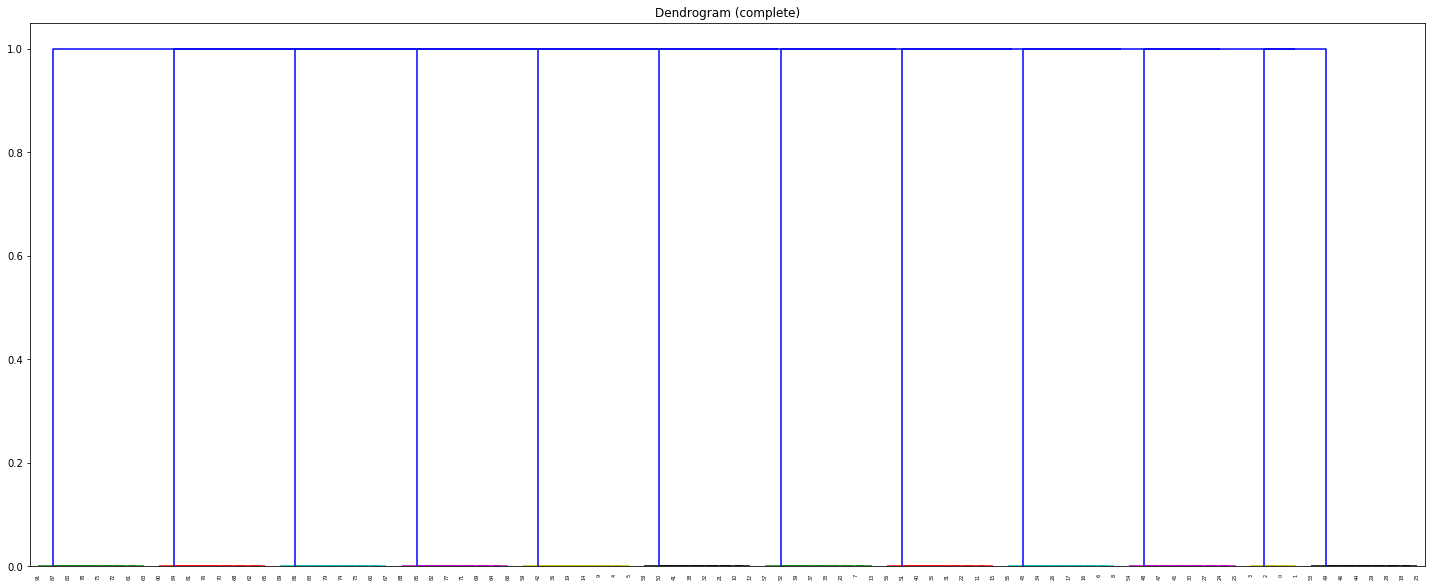

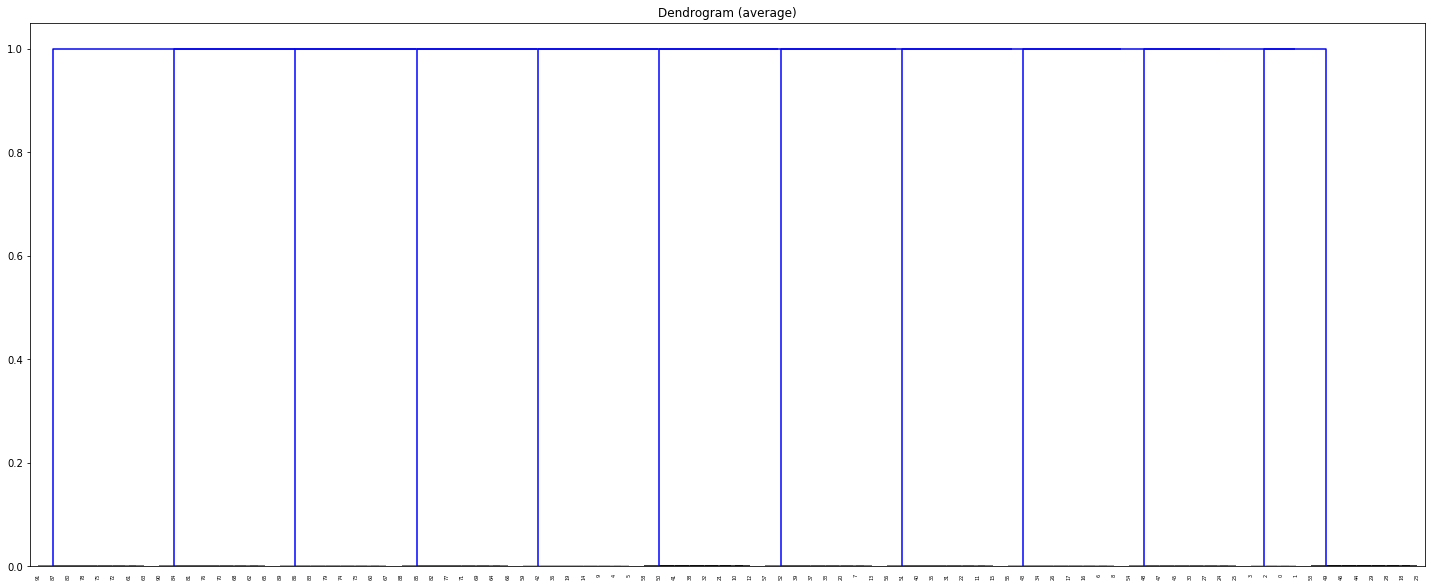

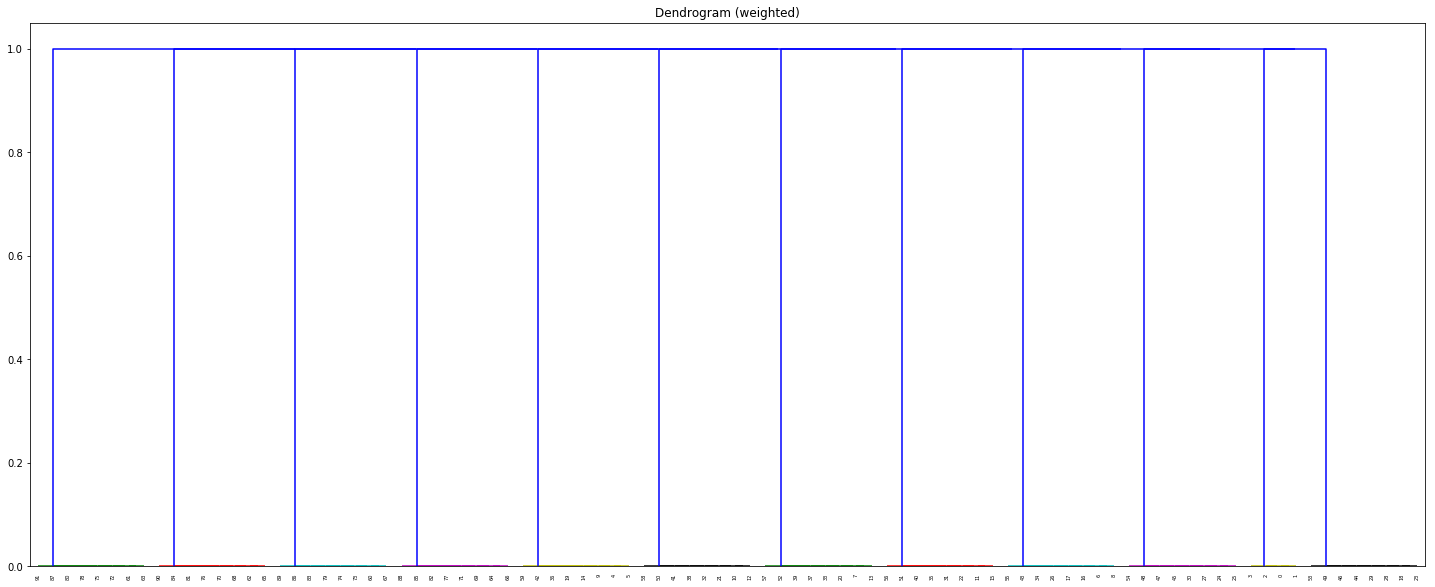

In [85]:
dendrograms = linkage_dendrogram(dist_matrix=dist_matrix, save_to_folder=None)

## 4-colorability of Rings
#### Clustering Equivalent Solutions